In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, pystan as ps, pickle
from pylab import plot, show, legend
from time import time
from scipy.stats import *

In [2]:
sm = ps.StanModel(file="SVM_WB.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_910f44601c827b01b37fb6f73a5dc88e NOW.


In [3]:
T = 2000;
y = npr.randn(T);
mu = 0
phi = 0.1
sigma = 2
h = np.zeros(T)
y = np.zeros(T)

h[0] = mu + sigma/(np.sqrt(1-phi**2))*npr.randn()
for t in np.arange(1,T) :
    h[t] = mu + phi*(h[t-1]-mu) + sigma*npr.randn()
for t in range(T) :
    y[t] = np.exp(h[t]/2)*npr.randn()

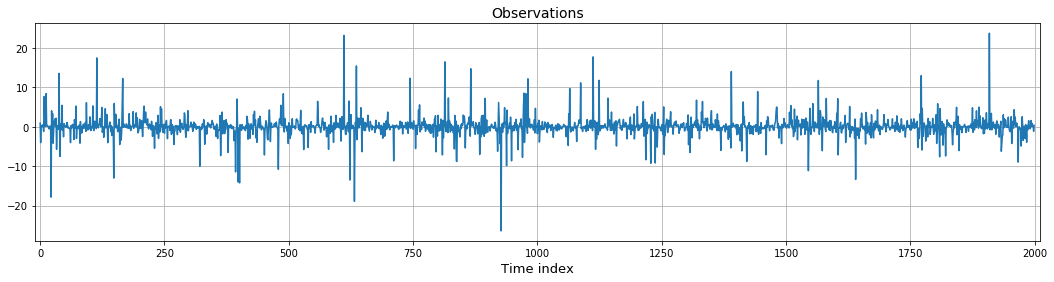

In [5]:
plt.figure(figsize=(18,4))
plt.plot(y)
plt.xlim(-0.005*T,1.005*T)
plt.title("Observations", fontsize=14)
plt.xlabel("Time index", fontsize=13)
plt.grid(True);

In [6]:
def plot_results(trace) :
    plt.figure(figsize=(18,3))
    plt.subplot(131)
    plt.plot(trace['mu'])
    plt.axhline(y=mu, color="red")
    plt.title(r"$\mu$", fontsize=14)
    plt.grid(True)
    plt.subplot(132)
    plt.plot(trace['phi'])
    plt.axhline(y=phi, color="red")
    plt.title(r"$\phi$", fontsize=14)
    plt.grid(True)
    plt.subplot(133)
    plt.plot(trace['sigma'])
    plt.axhline(y=sigma, color="red")
    plt.title(r"$\sigma$", fontsize=14)
    plt.grid(True)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


0.62 minutes to run


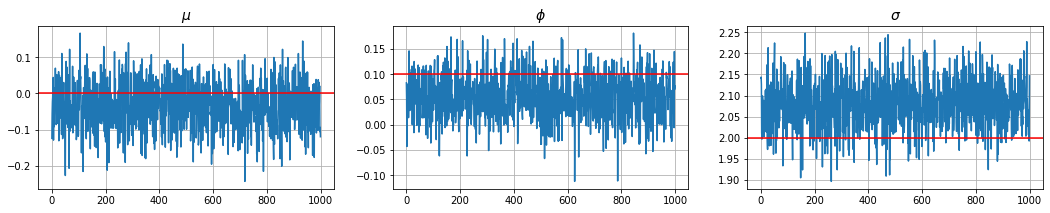

In [7]:
n_chains = 2
tstart, tend = 0, T
data = dict(T=T, y=y[tstart:tend], power_ll=1.0, power_lat=1.0, power_pr=1.0);
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1000)
print(round((time()-start)/60,2), "minutes to run")
plot_results(fit.extract())

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


6.89 minutes to run


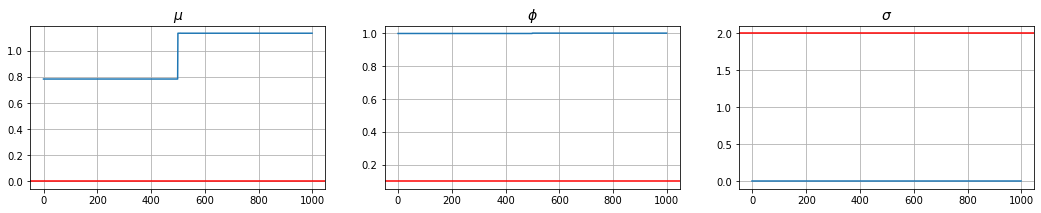

In [8]:
n_chains = 2
tstart, tend = 0, T
data = dict(T=T, y=y[tstart:tend], power_ll=5.0, power_lat=5.0, power_pr=1.0);
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1000)
print(round((time()-start)/60,2), "minutes to run")
plot_results(fit.extract())

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


5.67 minutes to run


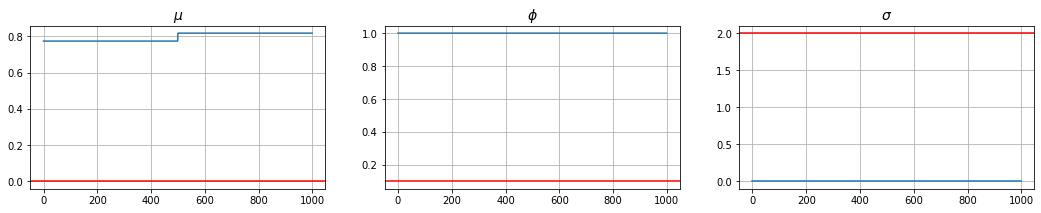

In [12]:
n_chains = 2
tstart, tend = 0, T
data = dict(T=T, y=y[tstart:tend], power_ll=5.0, power_lat=5.0, power_pr=5.0);
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1000)
print(round((time()-start)/60,2), "minutes to run")
plot_results(fit.extract())

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


3.82 minutes to run


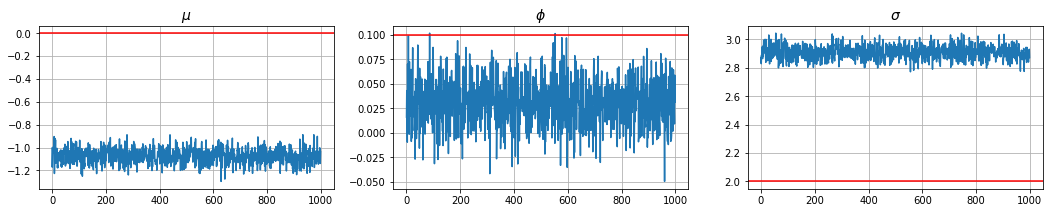

In [11]:
n_chains = 2
tstart, tend = 0, T
data = dict(T=T, y=y[tstart:tend], power_ll=5.0, power_lat=1.0, power_pr=1.0);
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1000)
print(round((time()-start)/60,2), "minutes to run")
plot_results(fit.extract())

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


0.64 minutes to run


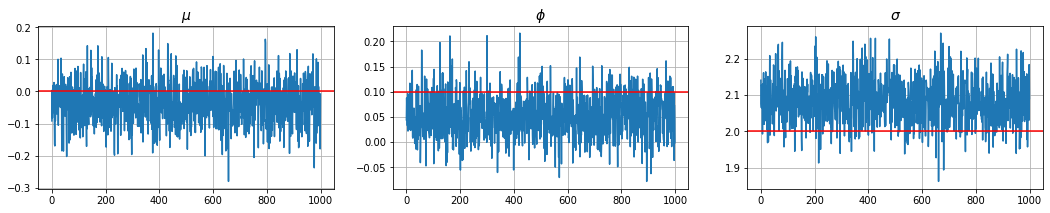

In [9]:
n_chains = 2
tstart, tend = 0, T
data = dict(T=T, y=y[tstart:tend], power_ll=1.0, power_lat=1., power_pr=1/5);
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1000)
print(round((time()-start)/60,2), "minutes to run")
plot_results(fit.extract())

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


0.55 minutes to run


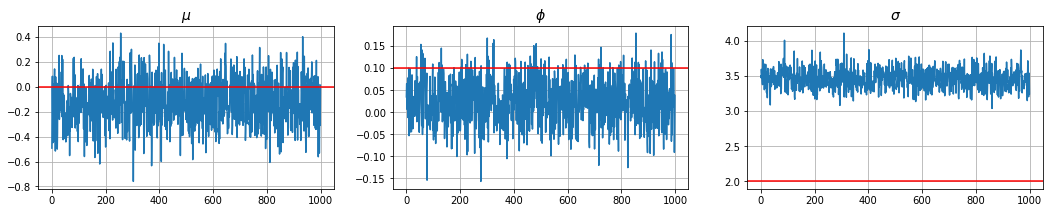

In [10]:
n_chains = 2
tstart, tend = 0, T
data = dict(T=T, y=y[tstart:tend], power_ll=1.0, power_lat=1/5, power_pr=1/5);
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1000)
print(round((time()-start)/60,2), "minutes to run")
plot_results(fit.extract())